In [116]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

#import dataset

In [117]:
bpl = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bpl

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [118]:
bpl.head(5000)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [119]:
bpl.shape

(5000, 14)

In [120]:
bpl.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [121]:
bpl.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [122]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

bpl['Experience'] = bpl['Experience'].abs()

bpl.describe().transpose()


count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.134600    11.415189     0.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [123]:
print(bpl.isnull().any())

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


In [124]:
print(bpl.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [125]:
#pip install missingno

<AxesSubplot:>

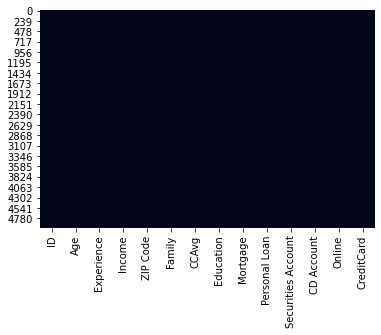

In [126]:
import missingno as msno
sns.heatmap(bpl.isnull(), cbar=False)

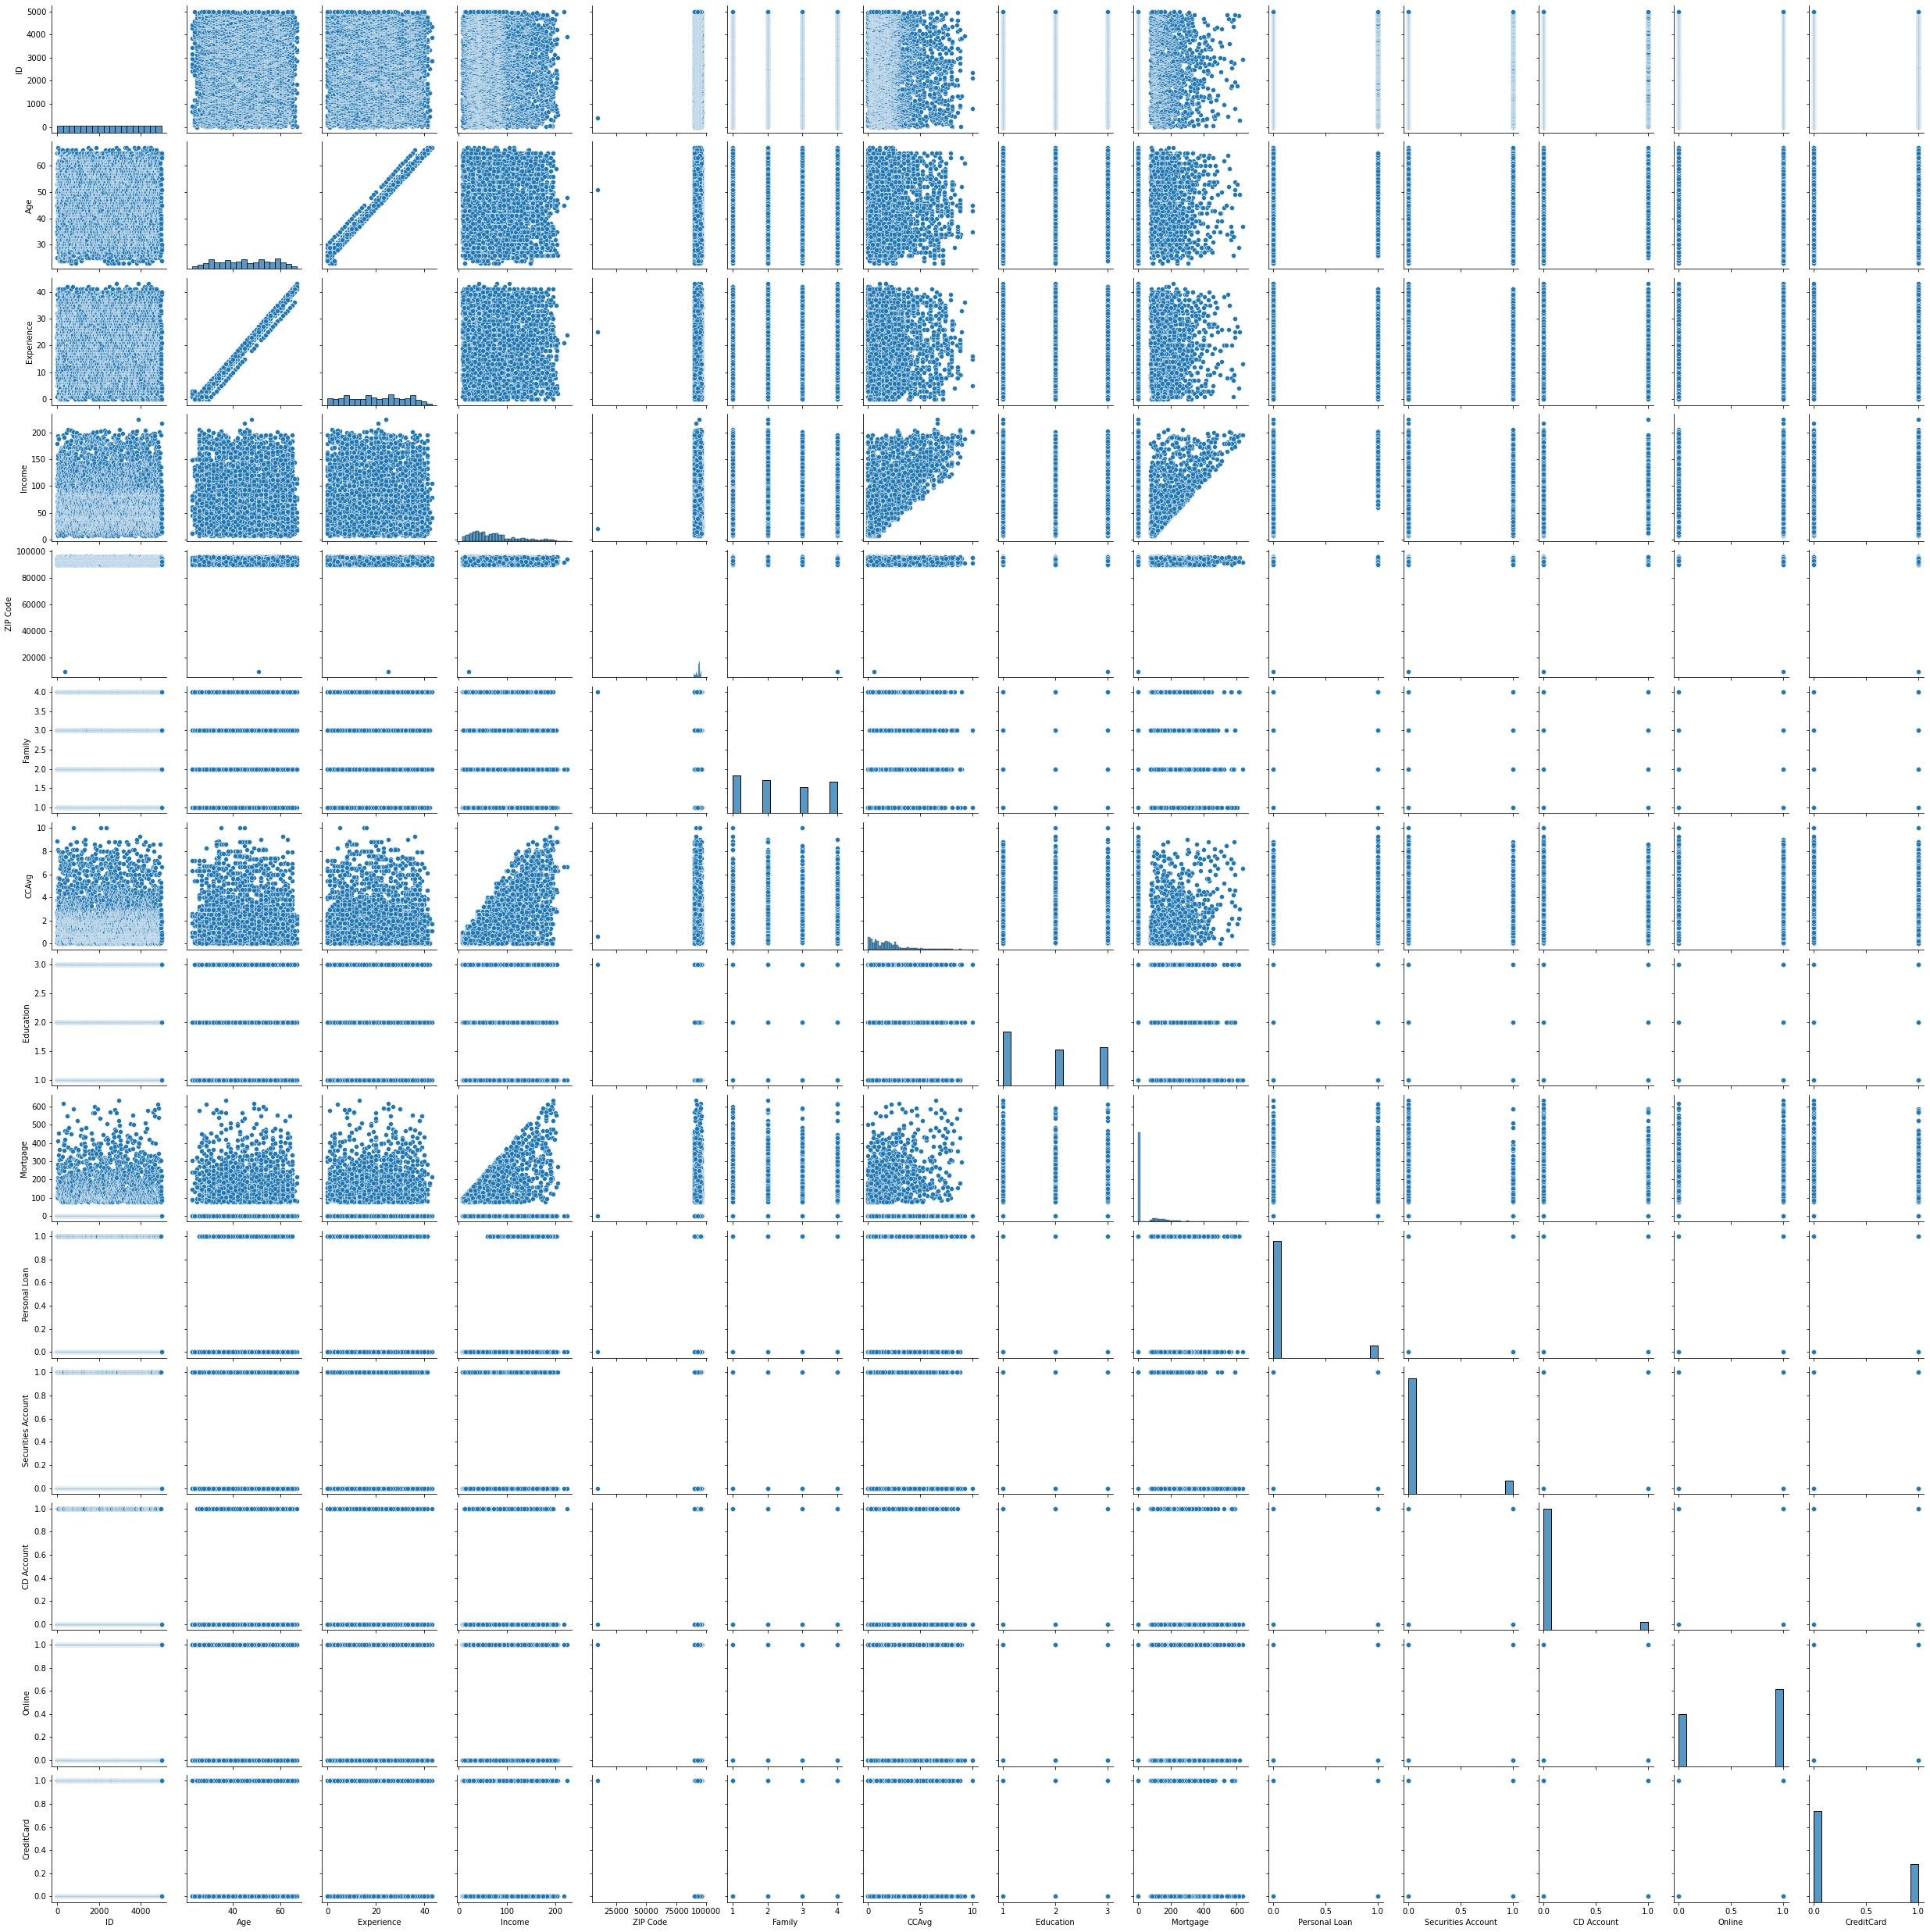

In [127]:
sns.pairplot(bpl)

In [128]:
bpl= bpl.drop(labels = ["ID", "ZIP Code"], axis = 1)
bpl.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [129]:
bpl.groupby(["Personal Loan"]).count()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
Personal Loan                                                                 
0              4520        4520    4520    4520   4520       4520      4520   
1               480         480     480     480    480        480       480   

               Securities Account  CD Account  Online  CreditCard  
Personal Loan                                                      
0                            4520        4520    4520        4520  
1                             480         480     480         480

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

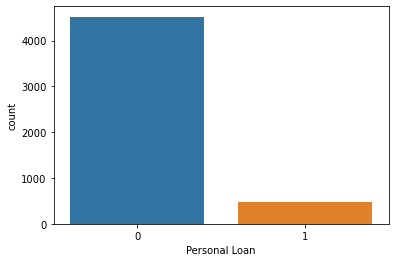

In [130]:
## Target Variable Frequency Distribution
freq = bpl['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

import seaborn as sns
sns.countplot(bpl['Personal Loan'])

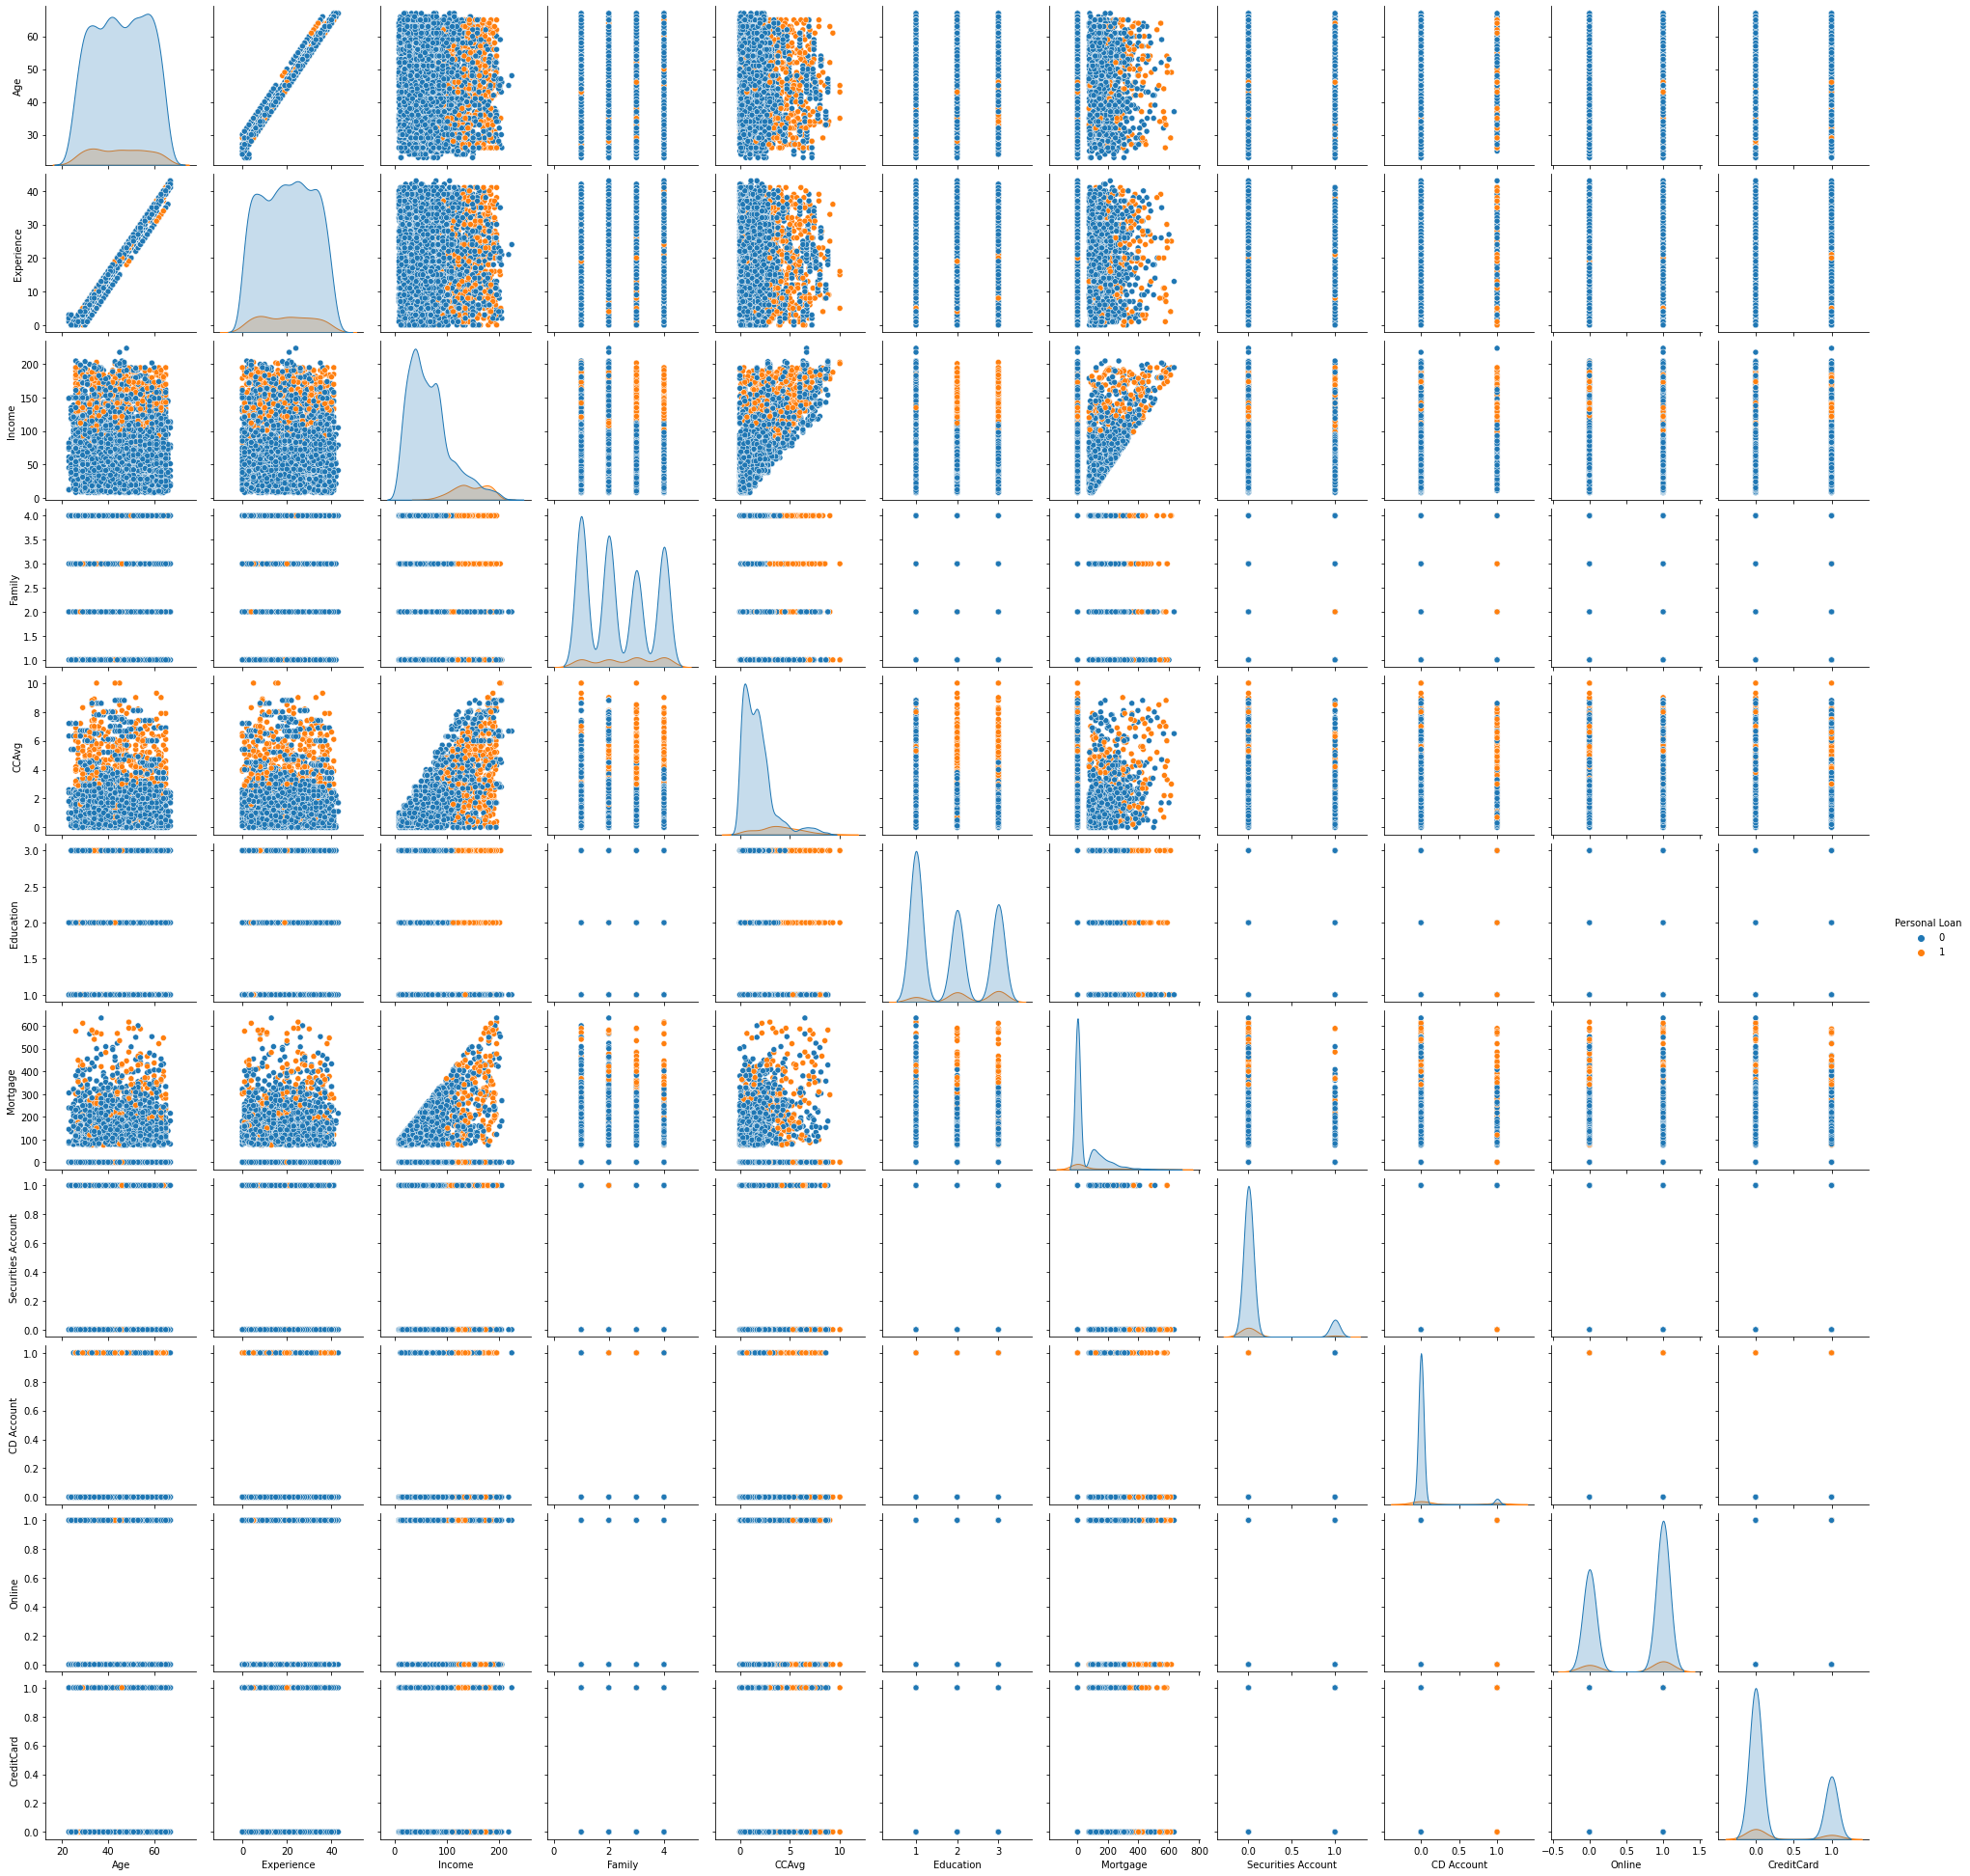

In [131]:
sns.pairplot(data=bpl, hue ="Personal Loan", diag_kind= "kde")

<AxesSubplot:xlabel='Age', ylabel='Density'>

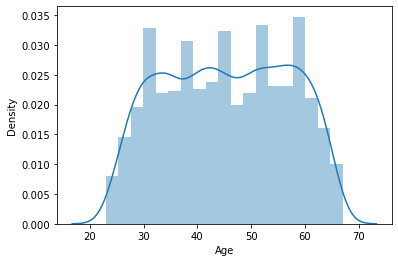

In [132]:
sns.distplot(bpl["Age"],bins = "auto")

<AxesSubplot:xlabel='Income', ylabel='Density'>

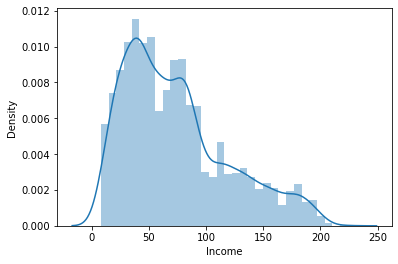

In [133]:
sns.distplot(bpl["Income"],bins = "auto")

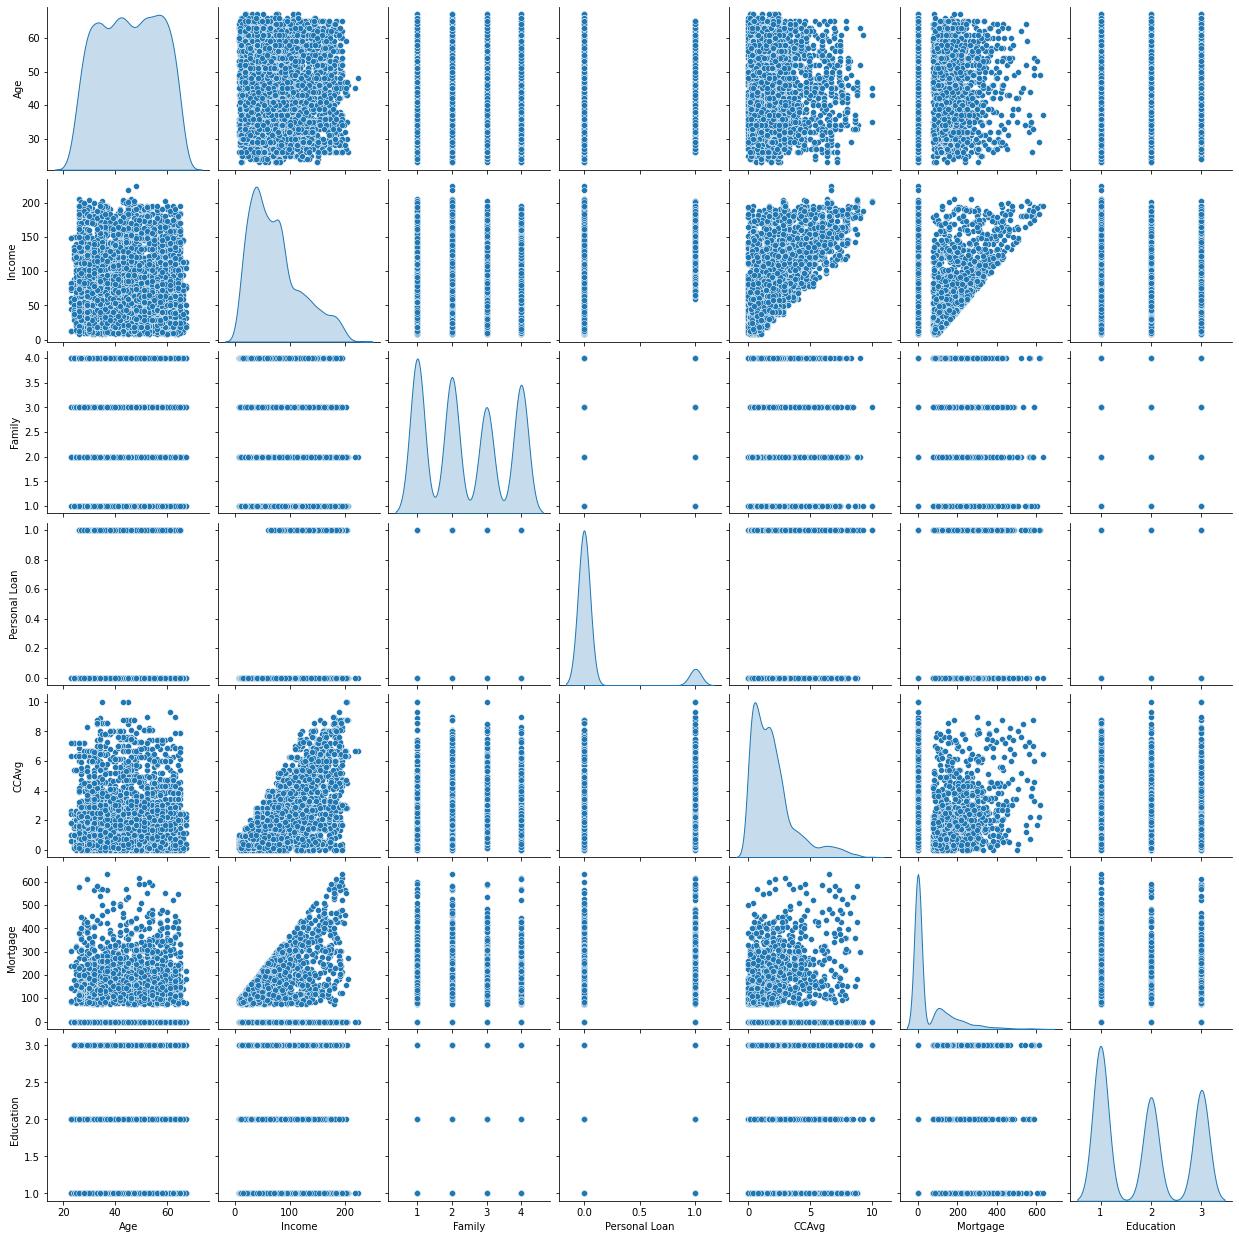

In [134]:
sns.pairplot(bpl[['Age','Income','Family','Personal Loan','CCAvg','Mortgage','Education']], diag_kind = 'kde')

<AxesSubplot:xlabel='Income', ylabel='Personal Loan'>

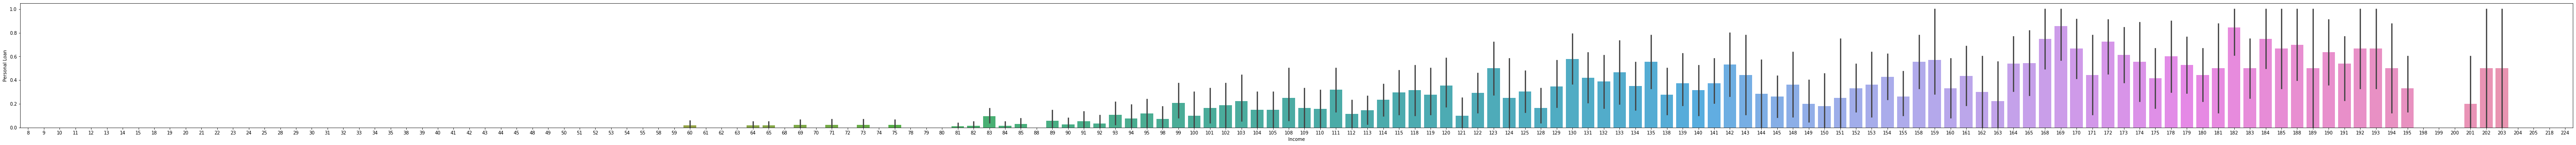

In [135]:
plt.figure(figsize=(100,5))
sns.barplot(x='Income', y='Personal Loan',data=bpl)


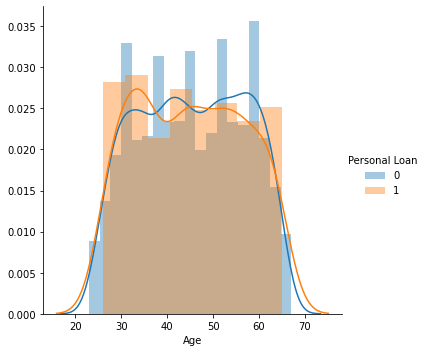

In [136]:
sns.FacetGrid(bpl,hue='Personal Loan',size=5).map(sns.distplot,"Age").add_legend()

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

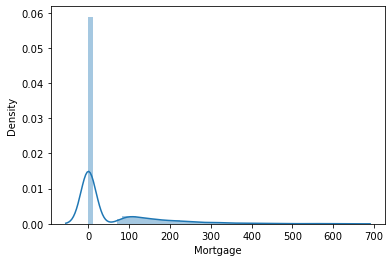

In [137]:
sns.distplot(bpl["Mortgage"],bins = "auto")

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

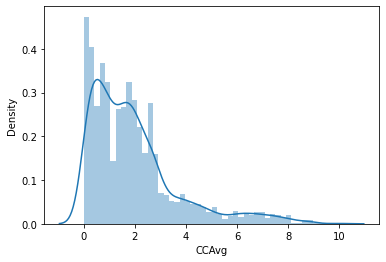

In [138]:
sns.distplot(bpl["CCAvg"],bins = "auto")

<AxesSubplot:xlabel='CCAvg', ylabel='Personal Loan'>

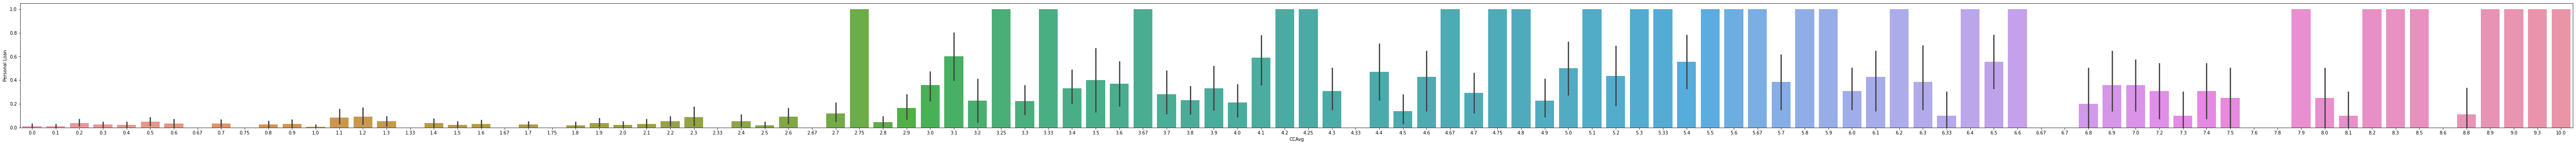

In [139]:
plt.figure(figsize=(100,5))
sns.barplot(x='CCAvg', y='Personal Loan',data=bpl)

<AxesSubplot:xlabel='Education', ylabel='Personal Loan'>

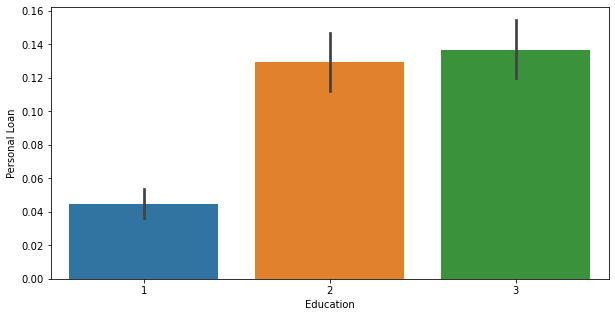

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(x='Education', y='Personal Loan',data=bpl)

   Securities Account  count    prop
0                   0   4478  0.8956
1                   1    522  0.1044


<AxesSubplot:xlabel='Securities Account', ylabel='count'>

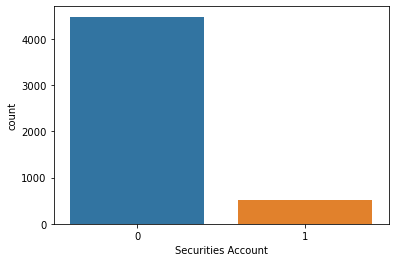

In [141]:
freq = bpl['Securities Account'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(bpl['Securities Account'])

   CD Account  count    prop
0           0   4698  0.9396
1           1    302  0.0604


<AxesSubplot:xlabel='CD Account', ylabel='count'>

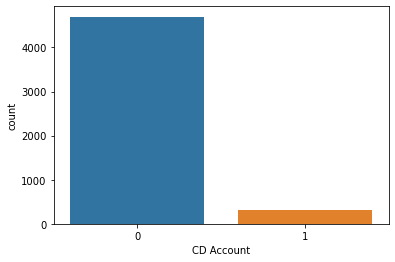

In [142]:
freq = bpl['CD Account'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(bpl['CD Account'])

<AxesSubplot:ylabel='Income'>

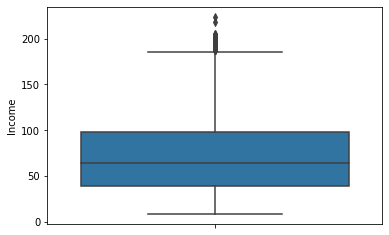

In [143]:
sns.boxplot(y = 'Income', data = bpl)

<AxesSubplot:ylabel='CCAvg'>

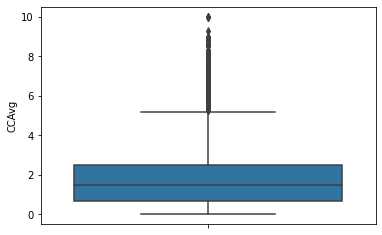

In [144]:
sns.boxplot(y = 'CCAvg', data = bpl)

<AxesSubplot:ylabel='Mortgage'>

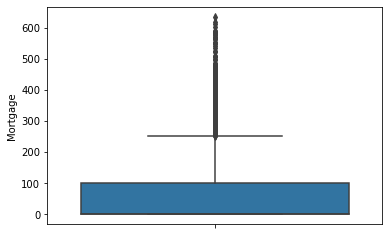

In [145]:
sns.boxplot(y = 'Mortgage', data = bpl)

<AxesSubplot:xlabel='Education', ylabel='Income'>

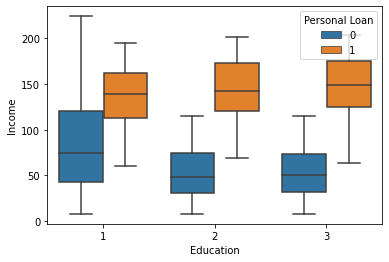

In [146]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = bpl)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

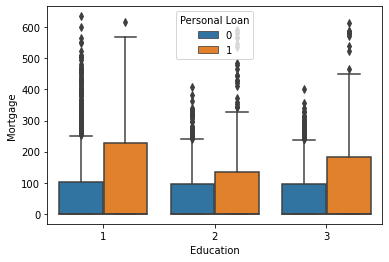

In [147]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bpl)

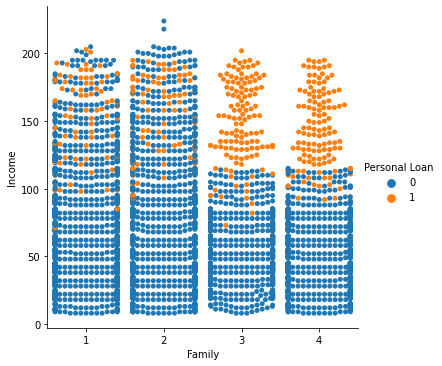

In [148]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = bpl, kind='swarm')

In [149]:
##### Outlier Function
def outlier_treatment(df_out, col_name):
    df_out = df_out.copy()
    x = df_out[col_name]
    median, std = x.median(), x.std()
    upper_outlier_value = median + 2 * std
    lower_outlier_value = median - 2 * std

    upper_outlier_row_index = (x - median) > 2 * std
    lower_outlier_row_index = (median - x) > 2 * std

    x[upper_outlier_row_index] = upper_outlier_value
    x[lower_outlier_row_index] = lower_outlier_value
    return x

bpl["Mortgage_cap"] = outlier_treatment(df_out = bpl, col_name = "Mortgage")
 
bpl["Mortgage_cap"].describe()

count    5000.000000
mean       46.722905
std        74.514403
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       203.427604
Name: Mortgage_cap, dtype: float64

In [150]:
##### Outlier Function
def outlier_treatment(df_out, col_name):
    df_out = df_out.copy()
    x = df_out[col_name]
    median, std = x.median(), x.std()
    upper_outlier_value = median + 2 * std
    lower_outlier_value = median - 2 * std

    upper_outlier_row_index = (x - median) > 2 * std
    lower_outlier_row_index = (median - x) > 2 * std

    x[upper_outlier_row_index] = upper_outlier_value
    x[lower_outlier_row_index] = lower_outlier_value
    return x

bpl["CCAvg_cap"] = outlier_treatment(df_out = bpl, col_name = "CCAvg")
 
bpl["CCAvg_cap"].describe()

count    5000.000000
mean        1.817277
std         1.420167
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         4.995318
Name: CCAvg_cap, dtype: float64

In [151]:
##### Outlier Function
def outlier_treatment(df_out, col_name):
    df_out = df_out.copy()
    x = df_out[col_name]
    median, std = x.median(), x.std()
    upper_outlier_value = median + 2 * std
    lower_outlier_value = median - 2 * std

    upper_outlier_row_index = (x - median) > 2 * std
    lower_outlier_row_index = (median - x) > 2 * std

    x[upper_outlier_row_index] = upper_outlier_value
    x[lower_outlier_row_index] = lower_outlier_value
    return x

bpl["CCAvg_cap"] = outlier_treatment(df_out = bpl, col_name = "CCAvg")
 
bpl["CCAvg_cap"].describe()

count    5000.000000
mean        1.817277
std         1.420167
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         4.995318
Name: CCAvg_cap, dtype: float64

<AxesSubplot:ylabel='Income'>

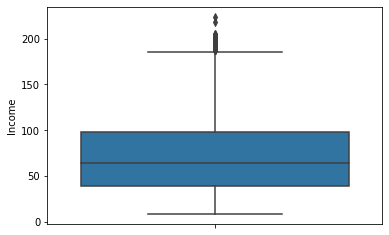

In [152]:
sns.boxplot(y = 'Income', data =bpl)

<AxesSubplot:ylabel='CCAvg'>

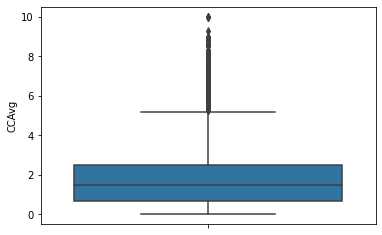

In [153]:
sns.boxplot(y = 'CCAvg', data = bpl)

<AxesSubplot:ylabel='Mortgage'>

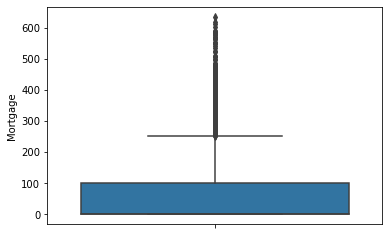

In [154]:
sns.boxplot(y = 'Mortgage', data = bpl)

In [155]:
bpl2= bpl.drop(labels = ["Mortgage"], axis = 1)
bpl2.head()

Age  Experience  Income  Family  CCAvg  Education  Personal Loan  \
0   25           1      49       4    1.6          1              0   
1   45          19      34       3    1.5          1              0   
2   39          15      11       1    1.0          1              0   
3   35           9     100       1    2.7          2              0   
4   35           8      45       4    1.0          2              0   

   Securities Account  CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap  
0                   1           0       0           0           0.0        1.6  
1                   1           0       0           0           0.0        1.5  
2                   0           0       0           0           0.0        1.0  
3                   0           0       0           0           0.0        2.7  
4                   0           0       0           1           0.0        1.0

In [156]:
bpl2= bpl2.drop(labels = ["CCAvg"], axis = 1)
bpl2.head()

Age  Experience  Income  Family  Education  Personal Loan  \
0   25           1      49       4          1              0   
1   45          19      34       3          1              0   
2   39          15      11       1          1              0   
3   35           9     100       1          2              0   
4   35           8      45       4          2              0   

   Securities Account  CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap  
0                   1           0       0           0           0.0        1.6  
1                   1           0       0           0           0.0        1.5  
2                   0           0       0           0           0.0        1.0  
3                   0           0       0           0           0.0        2.7  
4                   0           0       0           1           0.0        1.0

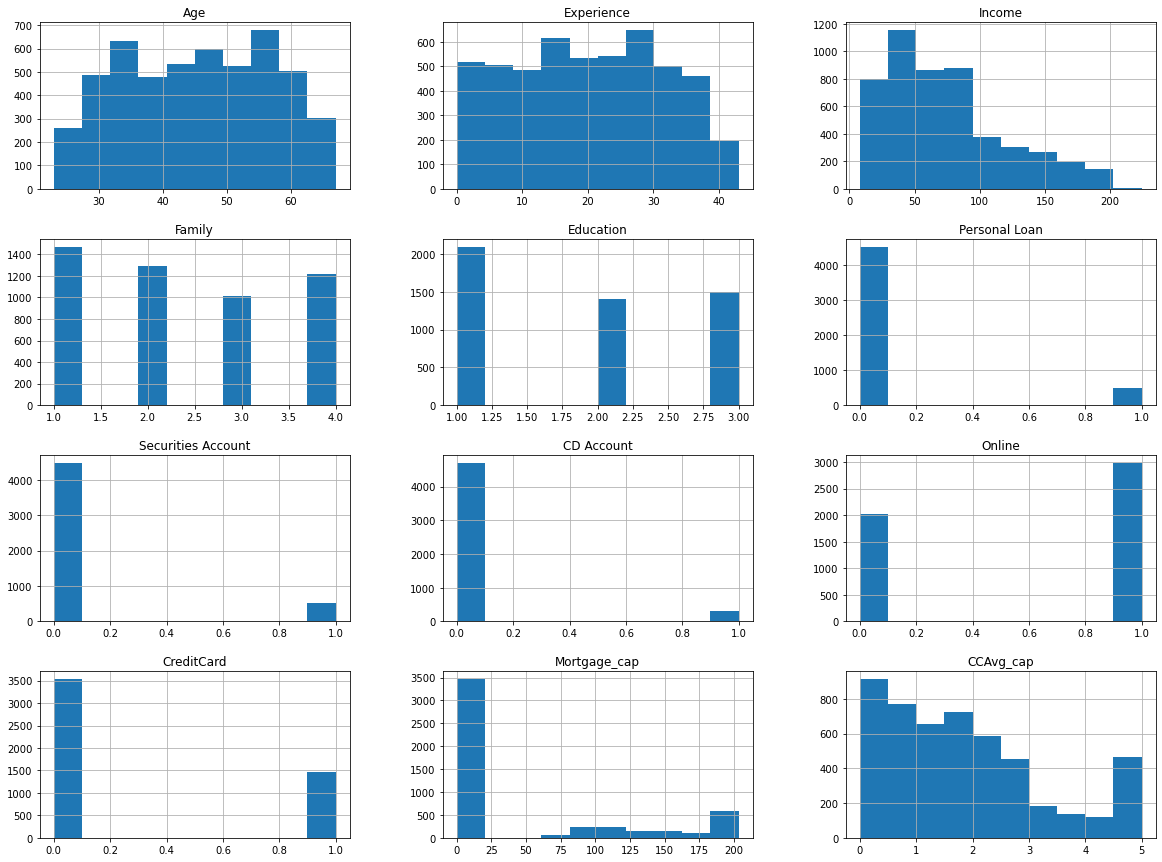

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
bpl2.hist(bins=10, figsize=(20,15))
plt.show()

<AxesSubplot:>

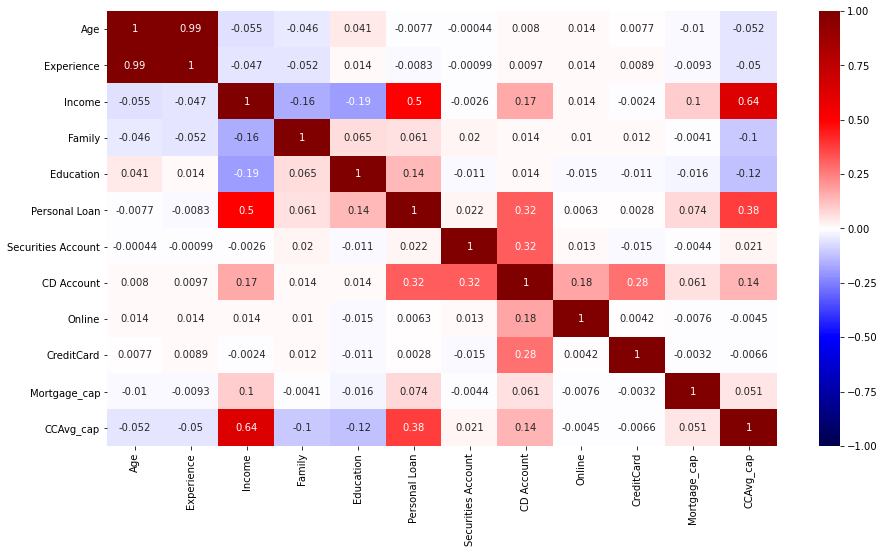

In [158]:
## Correlation Output
plt.figure(figsize=(15,8))
sns.heatmap(bpl2.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [159]:
## Transforming Age Variable
bpl2["DV_Age"]=bpl2["Age"].map(lambda
         x:45-(x-45) if x>45 else x)

In [160]:
bpl2.head()

Age  Experience  Income  Family  Education  Personal Loan  \
0   25           1      49       4          1              0   
1   45          19      34       3          1              0   
2   39          15      11       1          1              0   
3   35           9     100       1          2              0   
4   35           8      45       4          2              0   

   Securities Account  CD Account  Online  CreditCard  Mortgage_cap  \
0                   1           0       0           0           0.0   
1                   1           0       0           0           0.0   
2                   0           0       0           0           0.0   
3                   0           0       0           0           0.0   
4                   0           0       0           1           0.0   

   CCAvg_cap  DV_Age  
0        1.6      25  
1        1.5      45  
2        1.0      39  
3        2.7      35  
4        1.0      35

In [161]:
bpl2= bpl2.drop(labels = ["Age"], axis = 1)
bpl2.head()

Experience  Income  Family  Education  Personal Loan  Securities Account  \
0           1      49       4          1              0                   1   
1          19      34       3          1              0                   1   
2          15      11       1          1              0                   0   
3           9     100       1          2              0                   0   
4           8      45       4          2              0                   0   

   CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap  DV_Age  
0           0       0           0           0.0        1.6      25  
1           0       0           0           0.0        1.5      45  
2           0       0           0           0.0        1.0      39  
3           0       0           0           0.0        2.7      35  
4           0       0           1           0.0        1.0      35

<AxesSubplot:xlabel='DV_Age', ylabel='Density'>

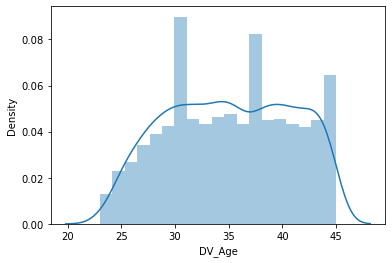

In [162]:
sns.distplot(bpl2["DV_Age"],bins = "auto")

<AxesSubplot:xlabel='DV_Age', ylabel='Personal Loan'>

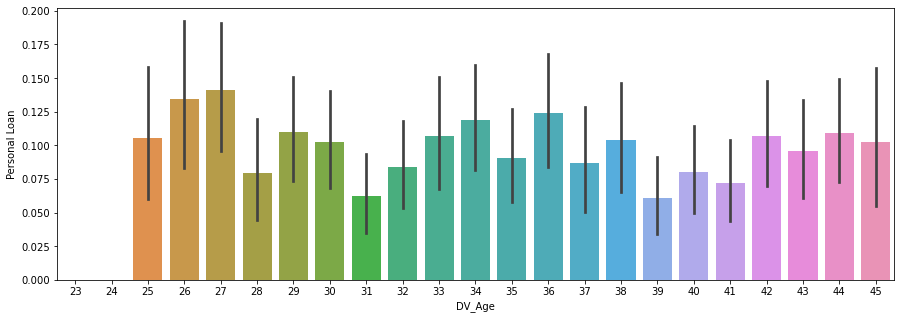

In [163]:
plt.figure(figsize=(15,5))
sns.barplot(x='DV_Age', y='Personal Loan',data=bpl2)

<AxesSubplot:xlabel='DV_Age', ylabel='Income'>

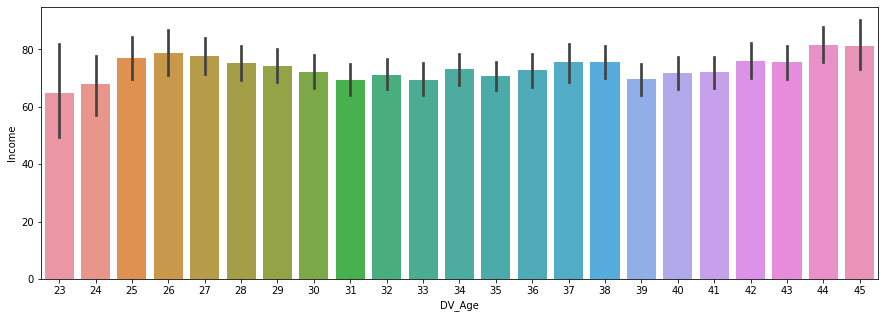

In [164]:
plt.figure(figsize=(15,5))
sns.barplot(x='DV_Age', y='Income',data=bpl2)

<AxesSubplot:xlabel='DV_Age', ylabel='CCAvg_cap'>

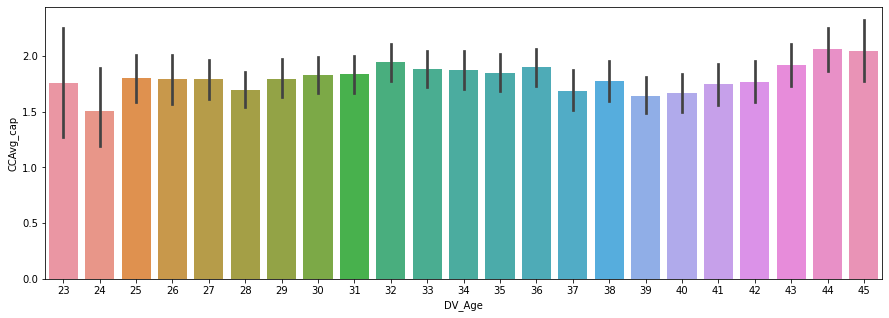

In [165]:
plt.figure(figsize=(15,5))
sns.barplot(x='DV_Age', y='CCAvg_cap',data=bpl2)

<AxesSubplot:xlabel='DV_Age', ylabel='Mortgage_cap'>

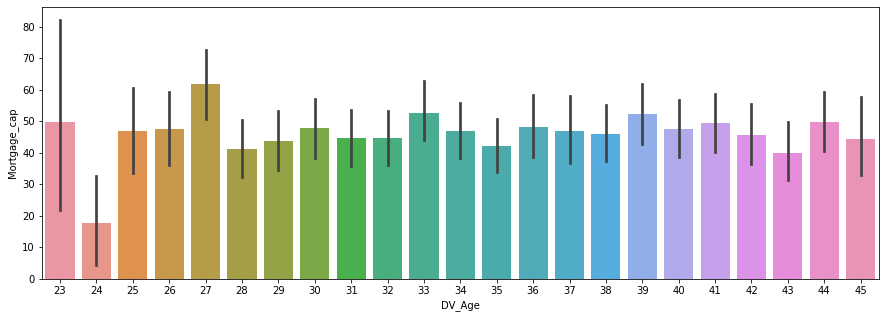

In [166]:
plt.figure(figsize=(15,5))
sns.barplot(x='DV_Age', y='Mortgage_cap',data=bpl2)

<AxesSubplot:>

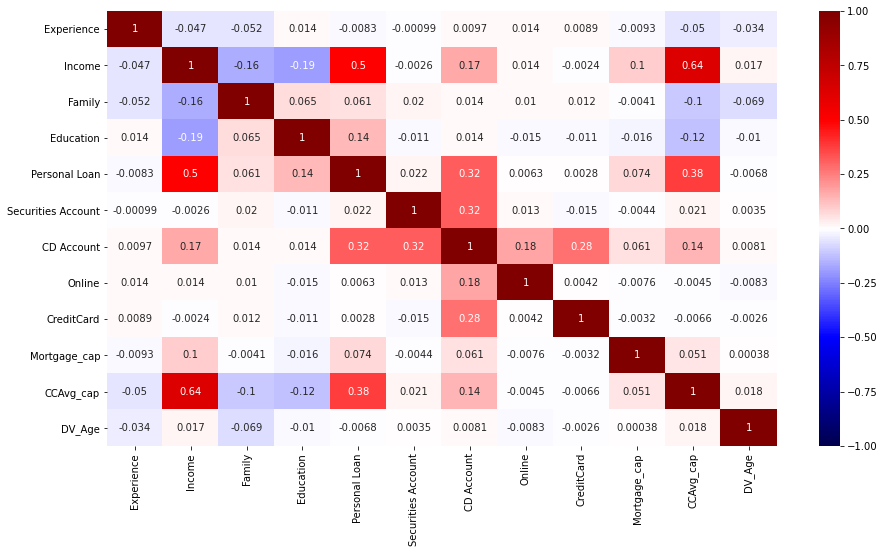

In [167]:
## Correlation Output
plt.figure(figsize=(15,8))
sns.heatmap(bpl2.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [168]:
## Transforming Age Variable
bpl2["DV_Income"]=bpl2["Income"].map(lambda
         x:59-(x-59) if x<59 else x)

In [169]:
bpl2.head()

Experience  Income  Family  Education  Personal Loan  Securities Account  \
0           1      49       4          1              0                   1   
1          19      34       3          1              0                   1   
2          15      11       1          1              0                   0   
3           9     100       1          2              0                   0   
4           8      45       4          2              0                   0   

   CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap  DV_Age  DV_Income  
0           0       0           0           0.0        1.6      25         69  
1           0       0           0           0.0        1.5      45         84  
2           0       0           0           0.0        1.0      39        107  
3           0       0           0           0.0        2.7      35        100  
4           0       0           1           0.0        1.0      35         73

In [170]:
bpl3= bpl2.drop(labels = ["Income"], axis = 1)
bpl3.head()

Experience  Family  Education  Personal Loan  Securities Account  \
0           1       4          1              0                   1   
1          19       3          1              0                   1   
2          15       1          1              0                   0   
3           9       1          2              0                   0   
4           8       4          2              0                   0   

   CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap  DV_Age  DV_Income  
0           0       0           0           0.0        1.6      25         69  
1           0       0           0           0.0        1.5      45         84  
2           0       0           0           0.0        1.0      39        107  
3           0       0           0           0.0        2.7      35        100  
4           0       0           1           0.0        1.0      35         73

<AxesSubplot:xlabel='DV_Income', ylabel='Personal Loan'>

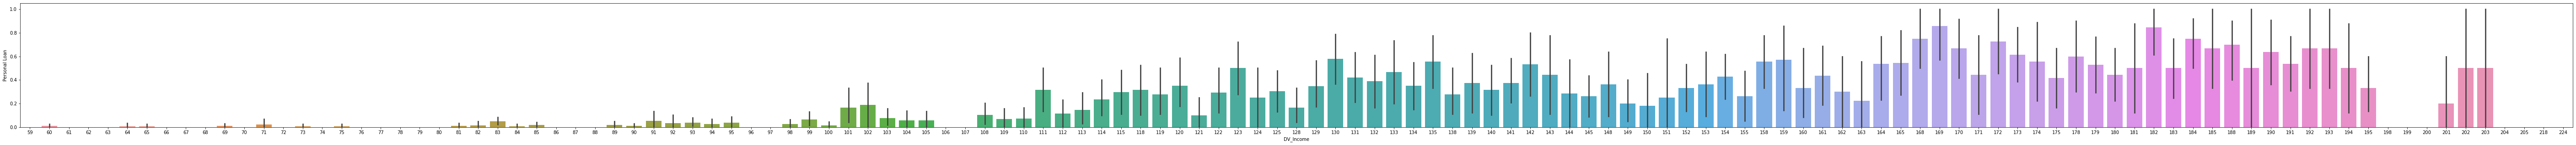

In [171]:
plt.figure(figsize=(100,5))
sns.barplot(x='DV_Income', y='Personal Loan',data=bpl3)


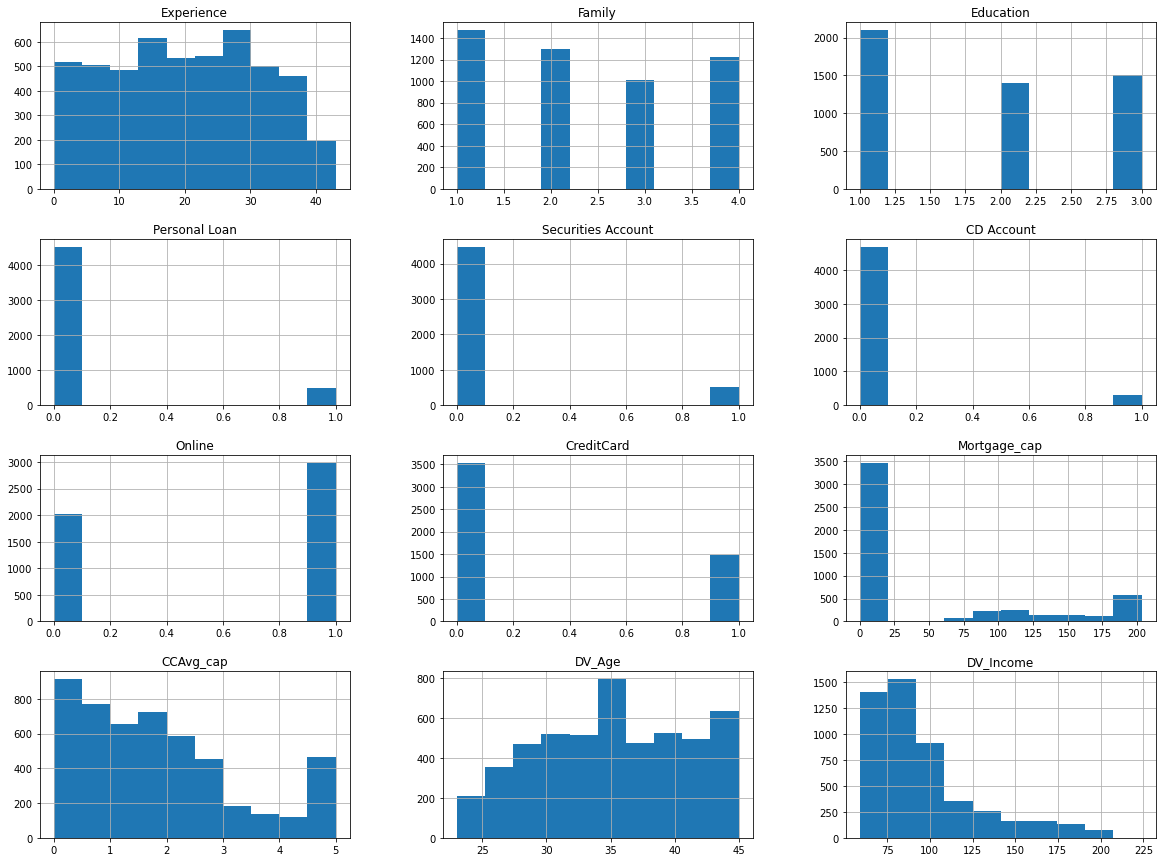

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
bpl3.hist(bins=10, figsize=(20,15))
plt.show()

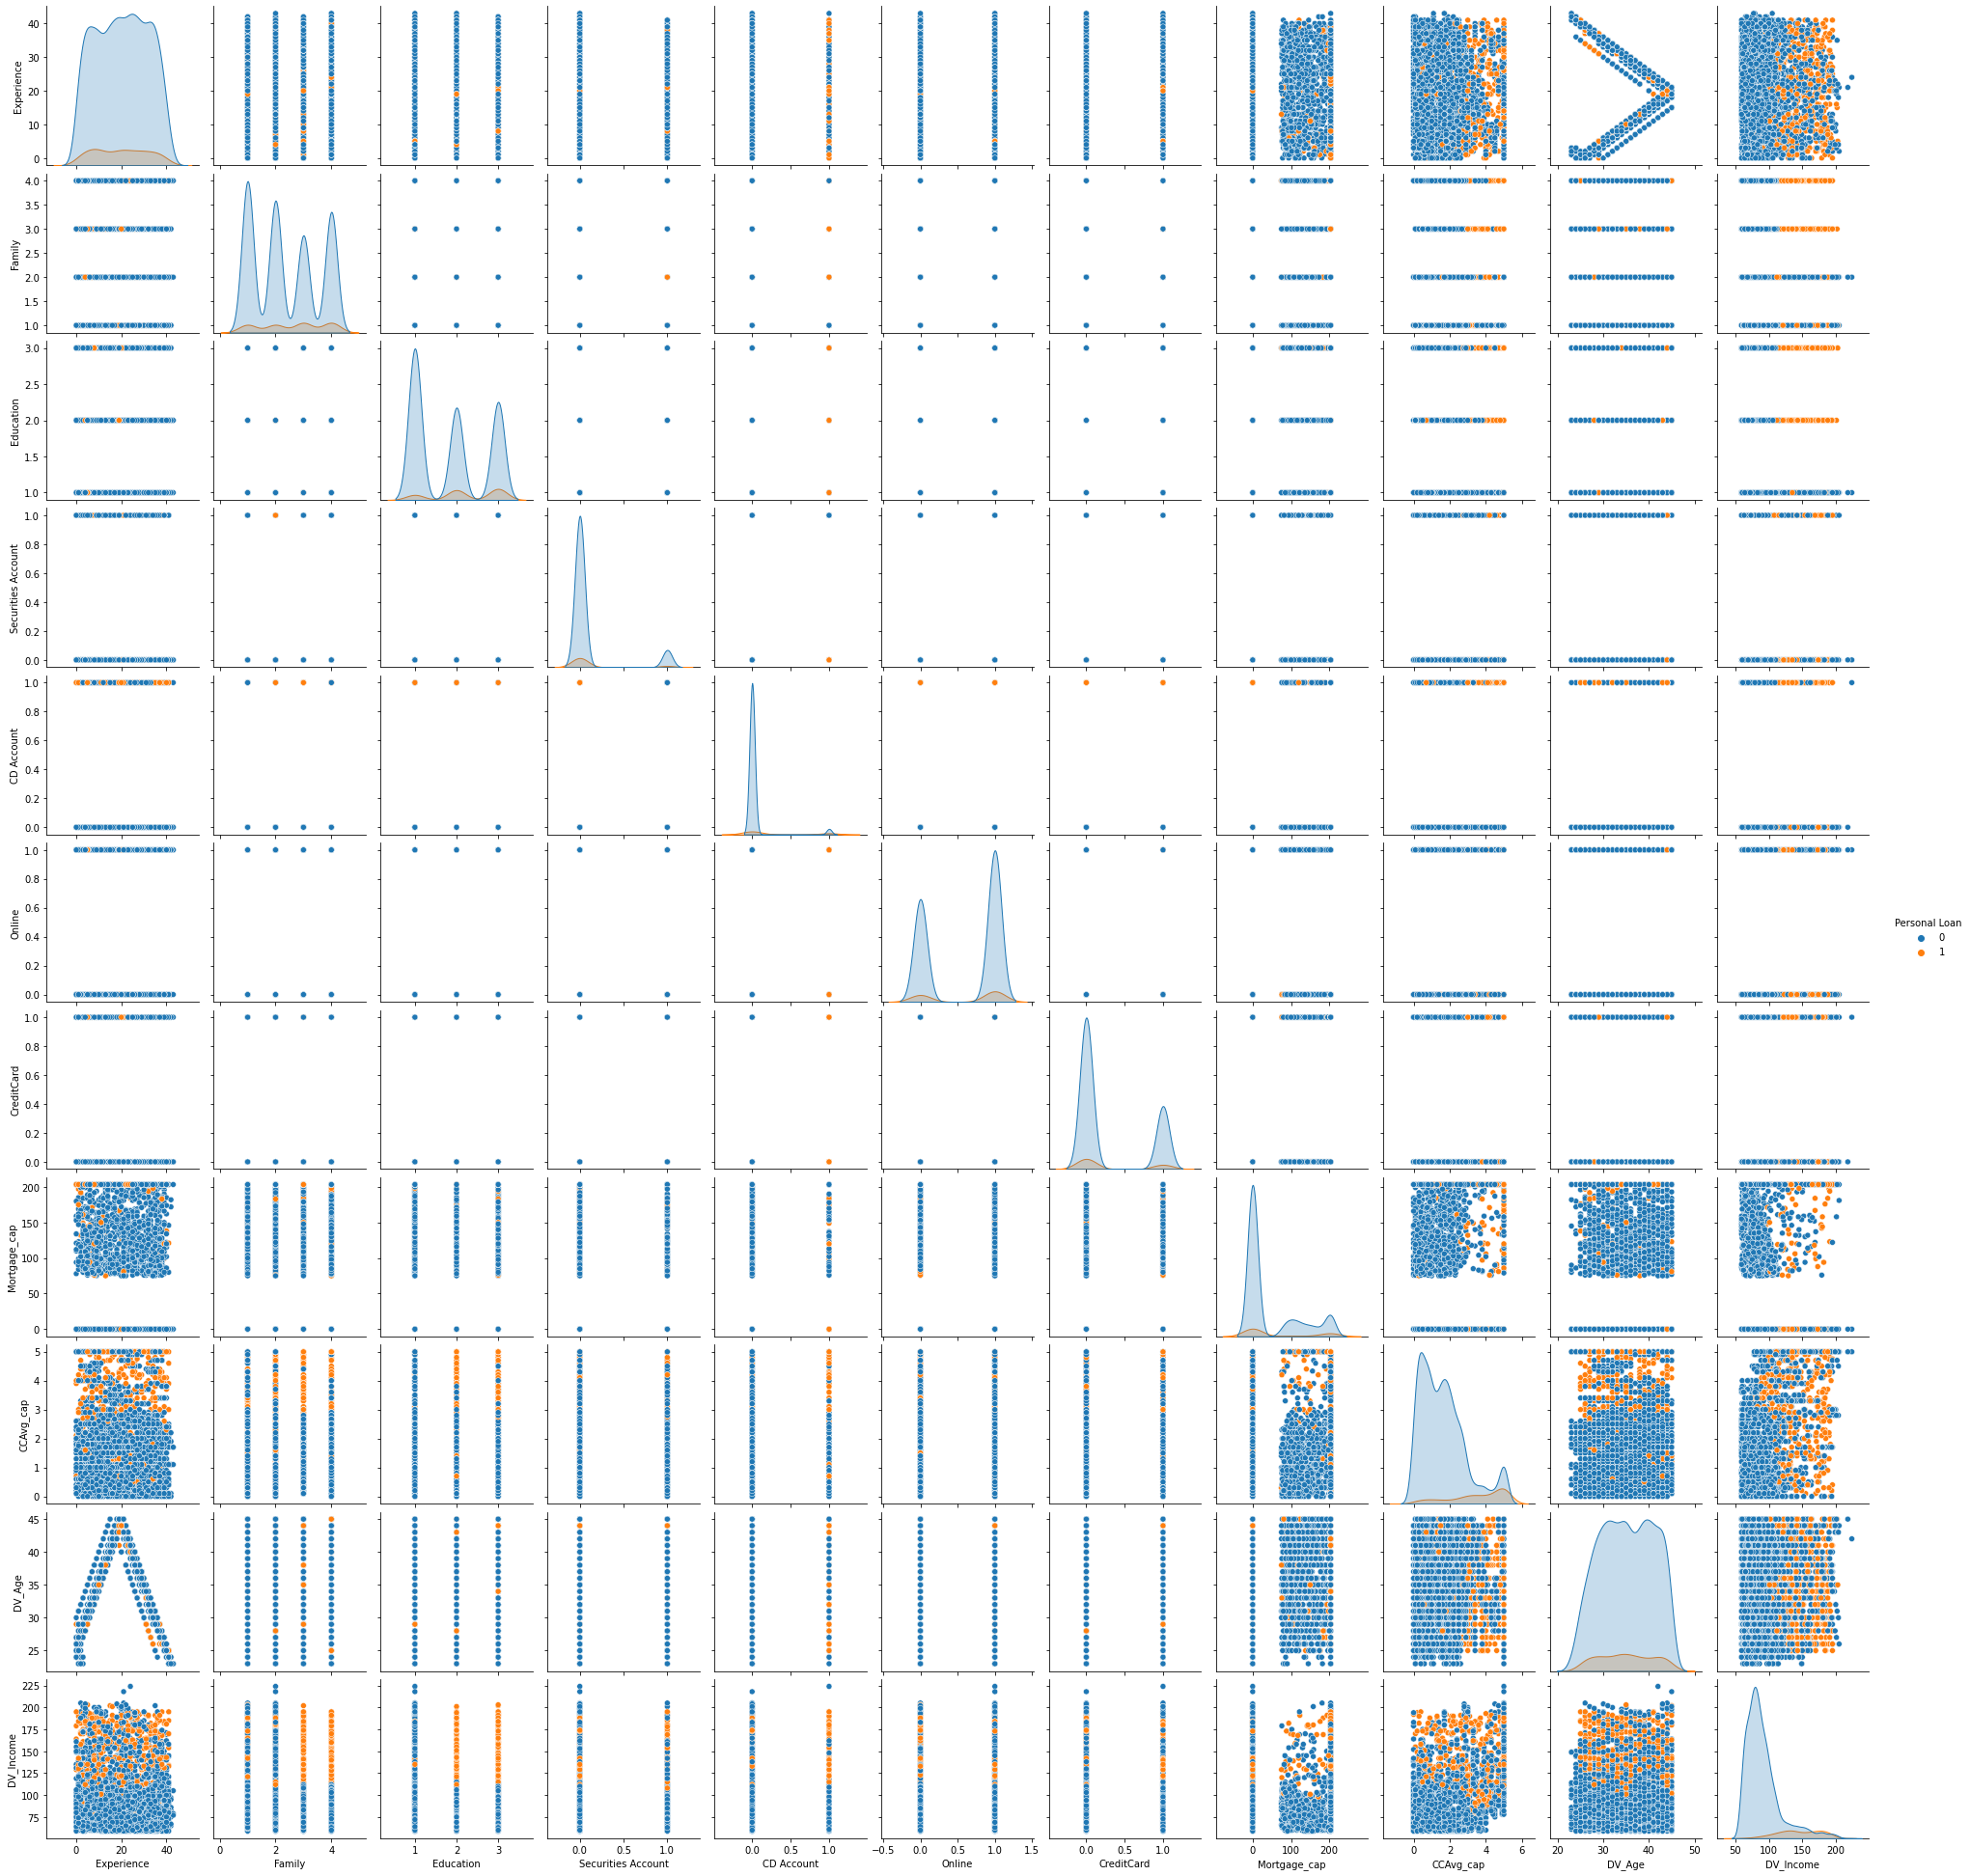

In [173]:
sns.pairplot(data=bpl3, hue ="Personal Loan", diag_kind= "kde")

   Family  count    prop
0       1   1472  0.2944
1       2   1296  0.2592
2       4   1222  0.2444
3       3   1010  0.2020


<AxesSubplot:xlabel='Family', ylabel='count'>

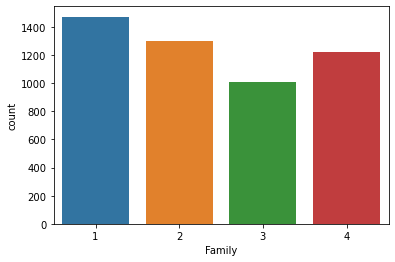

In [208]:
freq = bpl3['Family'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(bpl3['Family'])

   Education  count    prop
0          1   2096  0.4192
1          3   1501  0.3002
2          2   1403  0.2806


<AxesSubplot:xlabel='Education', ylabel='count'>

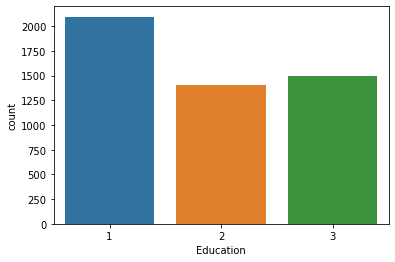

In [209]:
freq = bpl3['Education'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(bpl3['Education'])

   Online  count    prop
0       1   2984  0.5968
1       0   2016  0.4032


<AxesSubplot:xlabel='Online', ylabel='count'>

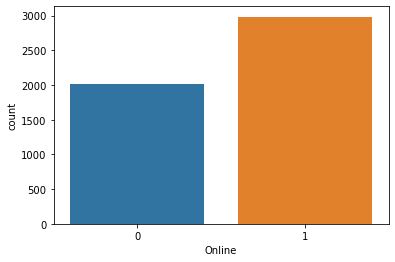

In [210]:
freq = bpl3['Online'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(bpl3['Online'])

   CreditCard  count   prop
0           0   3530  0.706
1           1   1470  0.294


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

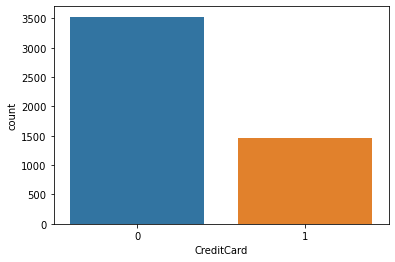

In [211]:
freq = bpl3['CreditCard'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(bpl3['CreditCard'])

In [178]:
#scaler = preprocessing.StandardScaler().fit(bpl3)
#mydata= scaler.transform(bpl3)
#mydata = pd.DataFrame(data=mydata, index=list(range(len(mydata))), columns=mydata.columns)

In [179]:
#exec(open("iv_function.py").read())


In [180]:
#iv = iv(df =bpl3, target ="Personal Loan")
#iv

In [181]:
#iv = information_value(df = df2.iloc[:], target ='df2.Personal Loan')

In [182]:
#iv

In [183]:
## Plotting the IV
#index = np.arange(len(iv.VAR_NAME))
#def plot_bar_x():
    # this is for plotting purpose
#    index = np.arange(len(iv.VAR_NAME))
#    plt.bar(index, iv.IV)
#    plt.xlabel('Var', fontsize=5)
#    plt.ylabel('IV', fontsize=5)
#    plt.xticks(index, iv.VAR_NAME, fontsize=5, rotation=30)
#    plt.title('IV Plot')
#    plt.show()

#plot_bar_x()  

In [184]:
#VIF Factor
#def VIF(formula,data):
#    from patsy import dmatrices
#    from statsmodels.stats.outliers_influence import variance_inflation_factor
#    y , X = dmatrices(formula,data = data,return_type="dataframe")
#    vif = pd.DataFrame()
#    vif["Variable"] = X.columns
#    vif["VIF"] = [variance_inflation_factor(X.values, i) 
#        for i in range(X.shape[1])]
#    return(vif.round(1))

#vif = VIF("""Personal Loan ~ DV_Age + CreditCard + Online 
#        + Experience + Securities Account + DV_Income + Family + CCAvg_cap + Mortgage+cap + Education""", data = bpl3)
#vif  

In [185]:
#Model development
#spliting into development, validation and hold-out sample
mydata = bpl3.copy()
mydata_dev, mydata_val, mydata_holdout = np.split(
        mydata.sample(frac=1, random_state=1212), 
        [int(.7*len(mydata)), 
         int(.8*len(mydata))]
        )

(len(mydata_dev), len(mydata_val), len(mydata_holdout))


(3500, 500, 1000)

In [186]:
mydata_dev.shape

(3500, 12)

In [196]:
mydata_dev.head()

Experience    Family  Education  Personal Loan  Securities Account  \
1622    2.639057  0.693147   0.693147           -inf                -inf   
802     2.484907  1.098612   0.000000           -inf                -inf   
1941    2.944439  0.693147   0.000000           -inf                -inf   
2414    2.302585  0.000000   0.000000           -inf                -inf   
4237    3.526361  1.098612   0.000000           -inf                 0.0   

      CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap    DV_Age  \
1622        -inf     0.0        -inf          -inf  -1.203973  3.663562   
802         -inf     0.0        -inf       5.31531   0.693147  3.583519   
1941        -inf     0.0        -inf          -inf   1.163151  3.761200   
2414        -inf    -inf        -inf          -inf   1.386294  3.526361   
4237        -inf    -inf        -inf          -inf   1.481605  3.401197   

      DV_Income  
1622   4.543295  
802    4.204693  
1941   4.094345  
2414   4.897840  
4237   4.356709

In [197]:
X_train = mydata_dev.drop(labels = ["Personal Loan"], axis = 1)
X_train

Experience    Family  Education  Securities Account  CD Account  Online  \
1622    2.639057  0.693147   0.693147                -inf        -inf     0.0   
802     2.484907  1.098612   0.000000                -inf        -inf     0.0   
1941    2.944439  0.693147   0.000000                -inf        -inf     0.0   
2414    2.302585  0.000000   0.000000                -inf        -inf    -inf   
4237    3.526361  1.098612   0.000000                 0.0        -inf    -inf   
...          ...       ...        ...                 ...         ...     ...   
3297    3.465736  0.000000   1.098612                -inf        -inf     0.0   
1206    3.610918  1.386294   1.098612                -inf        -inf    -inf   
506     3.218876  1.098612   1.098612                -inf        -inf    -inf   
4144    3.135494  0.693147   0.000000                -inf        -inf     0.0   
3730    1.791759  1.098612   0.000000                -inf        -inf     0.0   

      CreditCard  Mortgage_cap  CCAvg_cap    DV_Age  DV_Income  
1622        -inf          -inf  -1.203973  3.663562   4.543295  
802         -inf       5.31531   0.693147  3.583519   4.204693  
1941        -inf          -inf   1.163151  3.761200   4.094345  
2414        -inf          -inf   1.386294  3.526361   4.897840  
4237        -inf          -inf   1.481605  3.401197   4.356709  
...          ...           ...        ...       ...        ...  
3297         0.0          -inf  -1.203973  3.496508   4.553877  
1206        -inf          -inf   1.608501  3.295837   5.105945  
506         -inf          -inf  -0.105361  3.663562   4.304065  
4144         0.0          -inf   1.193922  3.761200   4.927254  
3730        -inf          -inf   0.916291  3.401197   4.718499  

[3500 rows x 11 columns]

In [198]:
y_train = mydata_dev[["Personal Loan"]]
y_train

Personal Loan
1622           -inf
802            -inf
1941           -inf
2414           -inf
4237           -inf
...             ...
3297           -inf
1206            0.0
506            -inf
4144           -inf
3730           -inf

[3500 rows x 1 columns]

In [199]:
y_train.shape

(3500, 1)

In [207]:
#val data set#
mydata_val.head()

Experience    Family  Education  Personal Loan  Securities Account  \
1937    3.218876  0.000000   1.098612            0.0                 0.0   
4346    3.044522  1.098612   0.000000           -inf                -inf   
2515    1.609438  0.000000   1.098612           -inf                -inf   
3468    2.944439  0.693147   0.693147           -inf                -inf   
4989        -inf  0.000000   1.098612           -inf                -inf   

      CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap    DV_Age  \
1937         0.0     0.0        -inf      5.315310   1.193922  3.663562   
4346         0.0     0.0         0.0      4.912655  -0.693147  3.806662   
2515        -inf     0.0        -inf      5.049856   0.641854  3.433987   
3468        -inf    -inf         0.0          -inf   0.587787  3.761200   
4989        -inf     0.0        -inf          -inf   0.000000  3.178054   

      DV_Income  
1937   5.198497  
4346   4.442651  
2515   4.430817  
3468   4.727388  
4989   4.382027

In [201]:
mydata_val.shape

(500, 12)

In [202]:
#scaler = preprocessing.StandardScaler().fit(mydata_val)
#mydata_val1= scaler.transform(mydata_val)
#mydata_val = pd.DataFrame(data=mydata_val1, index=list(range(len(mydata_val1))), columns=mydata_val.columns)

In [203]:
mydata_val.head()

Experience    Family  Education  Personal Loan  Securities Account  \
1937    3.218876  0.000000   1.098612            0.0                 0.0   
4346    3.044522  1.098612   0.000000           -inf                -inf   
2515    1.609438  0.000000   1.098612           -inf                -inf   
3468    2.944439  0.693147   0.693147           -inf                -inf   
4989        -inf  0.000000   1.098612           -inf                -inf   

      CD Account  Online  CreditCard  Mortgage_cap  CCAvg_cap    DV_Age  \
1937         0.0     0.0        -inf      5.315310   1.193922  3.663562   
4346         0.0     0.0         0.0      4.912655  -0.693147  3.806662   
2515        -inf     0.0        -inf      5.049856   0.641854  3.433987   
3468        -inf    -inf         0.0          -inf   0.587787  3.761200   
4989        -inf     0.0        -inf          -inf   0.000000  3.178054   

      DV_Income  
1937   5.198497  
4346   4.442651  
2515   4.430817  
3468   4.727388  
4989   4.382027

In [204]:
X_val = mydata_val.drop(labels = ["Personal Loan"], axis = 1)
X_val

Experience    Family  Education  Securities Account  CD Account  Online  \
1937    3.218876  0.000000   1.098612                 0.0         0.0     0.0   
4346    3.044522  1.098612   0.000000                -inf         0.0     0.0   
2515    1.609438  0.000000   1.098612                -inf        -inf     0.0   
3468    2.944439  0.693147   0.693147                -inf        -inf    -inf   
4989        -inf  0.000000   1.098612                -inf        -inf     0.0   
...          ...       ...        ...                 ...         ...     ...   
2139    3.465736  0.000000   1.098612                -inf        -inf     0.0   
902     3.496508  0.693147   0.000000                -inf        -inf    -inf   
2073    2.995732  0.000000   1.098612                -inf        -inf     0.0   
446     3.135494  0.000000   0.000000                -inf        -inf    -inf   
603     3.637586  0.693147   0.693147                -inf        -inf     0.0   

      CreditCard  Mortgage_cap  CCAvg_cap    DV_Age  DV_Income  
1937        -inf      5.315310   1.193922  3.663562   5.198497  
4346         0.0      4.912655  -0.693147  3.806662   4.442651  
2515        -inf      5.049856   0.641854  3.433987   4.430817  
3468         0.0          -inf   0.587787  3.761200   4.727388  
4989        -inf          -inf   0.000000  3.178054   4.382027  
...          ...           ...        ...       ...        ...  
2139        -inf          -inf  -2.302585  3.496508   4.727388  
902         -inf          -inf   0.470004  3.496508   4.553877  
2073         0.0      5.036953  -0.356675  3.784190   4.158883  
446          0.0          -inf   0.000000  3.761200   4.564348  
603         -inf      4.488636  -0.693147  3.295837   4.499810  

[500 rows x 11 columns]

In [205]:
y_val = mydata_val[["Personal Loan"]]
y_val

Personal Loan
1937            0.0
4346           -inf
2515           -inf
3468           -inf
4989           -inf
...             ...
2139           -inf
902            -inf
2073           -inf
446            -inf
603            -inf

[500 rows x 1 columns]

In [206]:
import statsmodels.formula.api as sm
import statsmodels.api
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [88]:
print (X_train.shape)
print (y_train.shape)

(3500, 11)
(3500, 1)


In [89]:
## Running regression with all the variables
#mylogit = sm.glm(formula = """Personal Loan~ Experience + Family + Education
#        +Securities Account+CD Account+Online+CreditCard+Mortgage_cap+CCAvg_cap+DV_Age+DV_Income""" , 
#        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
#mylogit.summary()

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [91]:
model_score = model.score(X_val, y_val)
y_predict = model.predict(X_val)
print(model_score)
print(metrics.confusion_matrix(y_val, y_predict))

0.96
[[454   3]
 [ 17  26]]


In [92]:
print(model_score)
print(metrics.confusion_matrix(y_val, y_predict))
print(metrics.classification_report(y_val, y_predict))

0.96
[[454   3]
 [ 17  26]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       457
           1       0.90      0.60      0.72        43

    accuracy                           0.96       500
   macro avg       0.93      0.80      0.85       500
weighted avg       0.96      0.96      0.96       500



In [93]:
# Accuracy calculation
#print((TP + TN) / float(TP + TN + FP + FN))
accuracy=(454+26)/(454+3+17+26)
precision=(454)/(454+17)
recall=(454)/(454+3)
classification_error = (17+26)/(454+3+17+26)
print(classification_error)
print(accuracy)
print(precision)
print(recall)

0.086
0.96
0.9639065817409767
0.9934354485776805


In [94]:
tpr=(454)/(454+26)
tnr=(26)/(26+17)
fpr=(17)/(17+26)
fnr=(3)/(454+3)

In [95]:
print(tpr)
print(tnr)
print(fpr)
print(fnr)

0.9458333333333333
0.6046511627906976
0.3953488372093023
0.006564551422319475


In [96]:
#prob=model.predict_proba(testX)
prob = model.predict(X_val)

In [97]:
prob

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, prob)
auc = roc_auc_score(y_val, prob)
print('AUC: %.3f' % auc)

AUC: 0.799


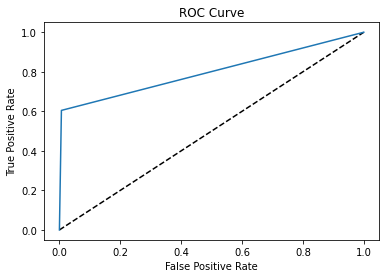

array([0.        , 0.59808661, 0.        ])

In [99]:
from sklearn.metrics import roc_curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
KS = (tpr - fpr)
KS

In [100]:
classification_error = (17+26)/(454+3+17+26)
print(classification_error)
print(1 - metrics.accuracy_score(y_val, y_predict))

0.086
0.040000000000000036


In [110]:
mydata_train = mydata_dev.copy()
mydata_val_02=mydata_val.copy()

In [114]:
mydata_train.shape


(3500, 12)

In [115]:
mydata_val_02.shape

(500, 12)

In [102]:
mydata_dev = np.log(mydata_dev)
mydata_val = np.log(mydata_val)

In [109]:
#scaler = preprocessing.StandardScaler().fit(mydata_dev)
#mydata_dev1= scaler.transform(mydata_dev)
#mydata_dev = pd.DataFrame(data=mydata_dev1, index=list(range(len(mydata_dev1))), columns=mydata_dev.columns)